In [1]:
!nvidia-smi

Fri Aug  2 04:03:37 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 546.80                 Driver Version: 546.80       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3060 ...  WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   49C    P8              15W / 104W |   2574MiB /  6144MiB |      1%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

C:\Users\ASUS\Desktop\GAMA


In [3]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.67  Python-3.11.9 torch-2.3.1+cpu CPU (12th Gen Intel Core(TM) i7-12650H)
Setup complete  (16 CPUs, 15.6 GB RAM, 139.1/953.0 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
%cd {HOME}
!yolo task=segment mode=predict model=yolov9c-seg.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg'

C:\Users\ASUS\Desktop\GAMA


C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


Ultralytics YOLOv8.2.67 ðŸš€ Python-3.11.9 torch-2.3.1+cpu CPU (12th Gen Intel Core(TM) i7-12650H)
YOLOv9c-seg summary (fused): 411 layers, 27,686,208 parameters, 0 gradients, 158.0 GFLOPs

image 1/1 C:\Users\ASUS\Desktop\GAMA\dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 879.6ms
Speed: 2.0ms preprocess, 879.6ms inference, 7.7ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs\segment\predict
ðŸ’¡ Learn more at https://docs.ultralytics.com/modes/predict



  0%|          | 0.00/53.9M [00:00<?, ?B/s]
  1%|          | 512k/53.9M [00:00<00:12, 4.55MB/s]
  2%|2         | 1.12M/53.9M [00:00<00:09, 5.55MB/s]
  3%|3         | 1.75M/53.9M [00:00<00:16, 3.41MB/s]
  4%|4         | 2.25M/53.9M [00:00<00:14, 3.77MB/s]
  5%|5         | 2.75M/53.9M [00:00<00:14, 3.81MB/s]
  6%|6         | 3.25M/53.9M [00:00<00:16, 3.13MB/s]
  7%|6         | 3.75M/53.9M [00:01<00:15, 3.37MB/s]
  8%|7         | 4.12M/53.9M [00:01<00:14, 3.50MB/s]
  8%|8         | 4.50M/53.9M [00:01<00:18, 2.87MB/s]
 10%|9         | 5.38M/53.9M [00:01<00:12, 3.99MB/s]
 11%|#         | 5.88M/53.9M [00:01<00:12, 3.97MB/s]
 12%|#1        | 6.38M/53.9M [00:01<00:12, 3.96MB/s]
 13%|#2        | 6.88M/53.9M [00:01<00:12, 3.95MB/s]
 14%|#3        | 7.38M/53.9M [00:02<00:12, 3.94MB/s]
 15%|#4        | 7.88M/53.9M [00:02<00:12, 3.94MB/s]
 16%|#5        | 8.38M/53.9M [00:02<00:12, 3.94MB/s]
 16%|#6        | 8.88M/53.9M [00:02<00:11, 3.95MB/s]
 17%|#7        | 9.38M/53.9M [00:02<00:11, 3.94MB/s]
 1

C:\Users\ASUS\Desktop\GAMA


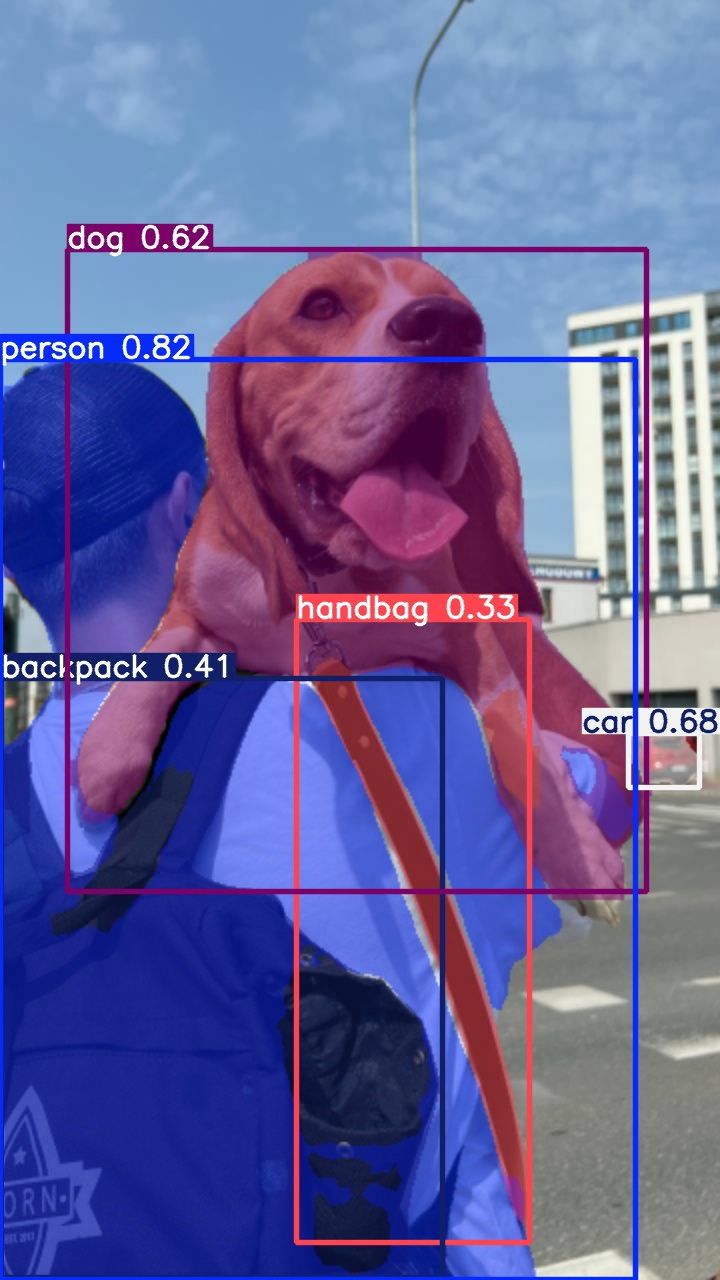

In [6]:
%cd {HOME}
Image(filename='runs/segment/predict/dog.jpeg', height=600)

In [7]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="BY7Lw4TGbaJ7KJUh9rJy")
project = rf.workspace("pavement-wwadi").project("screen-7i6h8")
version = project.version(2)
dataset = version.download("yolov9")


[WinError 2] The system cannot find the file specified: 'C:\\Users\\ASUS\\Desktop\\GAMA/datasets'
C:\Users\ASUS\Desktop\GAMA


The syntax of the command is incorrect.
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\magics\osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\ASUS\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.



loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to screen-2 in yolov9:: 100%|█████████████████████| 1692/1692 [00:01<00:00, 1453.85it/s]


In [ ]:
%cd {HOME}

#yolo task=segment mode=train model=yolov9c-seg.pt data={dataset.location}/data.yaml epochs=1 imgsz=640

!yolo task=segment mode=train model=yolov9c-seg.pt data='/content/datasets/screen-2/data.yaml' epochs=120 imgsz=640


/content
Ultralytics YOLOv8.2.71 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=segment, mode=train, model=yolov9c-seg.pt, data=/content/datasets/screen-2/data.yaml, epochs=120, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True

THIS BLOCK OF CODE IS FOR MARKING THE DISPLAY AND HUMAN ONLY

In [ ]:
from IPython import display
display.clear_output()
import ultralytics
ultralytics.checks()
import cv2
import numpy as np
from ultralytics import YOLO
def draw_road_polygon_on_image(img_path):
    display_size = (800, 600)
    # Read the image
    image = cv2.imread(img_path)
    # Load the model
    model = YOLO("best (human).pt")
    # Perform prediction using the model
    r = model.predict(img_path)
    # Iterate through each mask and draw the polygon on the image
    for mask_points in r[0].masks.xy:
        polygon_points = np.array(mask_points, np.int32)
        polygon_points = polygon_points.reshape((-1, 1, 2))
        cv2.polylines(image, [polygon_points], isClosed=True, color=(0, 255, 0), thickness=2)
        # Optionally fill the polygon
        # cv2.fillPoly(image, [polygon_points], color=(255, 255, 0))
    # Resize the image for display
    screen=YOLO("best (screen).pt")
    l = screen.predict(img_path)
    # Iterate through each mask and draw the polygon on the image
    for mask_points in l[0].masks.xy:
        polygon_points = np.array(mask_points, np.int32)
        polygon_points = polygon_points.reshape((-1, 1, 2))
        cv2.polylines(image, [polygon_points], isClosed=True, color=(0, 0, 255), thickness=2)
        # Optionally fill the polygon
        # cv2.fillPoly(image, [polygon_points], color=(255, 255, 0))
    # Resize the image for display
    resized_image = cv2.resize(image, display_size, interpolation=cv2.INTER_AREA)
    # Display the resized image with the polygons
    cv2.imshow('Polygon', resized_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


TO TEST WHETHER THE MODEL IS MARKING BOTH TYPES OF SCREEN AND THE HUMAN ( ---> STILL NOT WORKING) ITS MARKING GREEN AS SCREEN AND YELLOW AS HUMAN

In [ ]:
#test to check whether the code is marking both 2 types of screen as green and yellow
import cv2
import numpy as np
from ultralytics import YOLO

def draw_road_polygon_on_image(img_path):
    display_size = (800, 600)

    # Read the image
    image = cv2.imread(img_path)

    # Load the human model
    human_model = YOLO("best (human).pt")

    # Perform prediction using the human model
    human_predictions = human_model.predict(img_path)

    # Iterate through each mask from the human model and draw the polygon on the image in green
    for mask_points in human_predictions[0].masks.xy:
        polygon_points = np.array(mask_points, np.int32)
        polygon_points = polygon_points.reshape((-1, 1, 2))
        cv2.polylines(image, [polygon_points], isClosed=True, color=(0, 255, 0), thickness=2)

    # Load the screen model
    screen_model = YOLO("best (screen).pt")

    # Perform prediction using the screen model
    screen_predictions = screen_model.predict(img_path)

    # Iterate through each mask from the screen model and draw the polygon on the image in yellow
    for mask_points in screen_predictions[0].masks.xy:
        polygon_points = np.array(mask_points, np.int32)
        polygon_points = polygon_points.reshape((-1, 1, 2))
        cv2.polylines(image, [polygon_points], isClosed=True, color=(0, 255, 255), thickness=2)

    # Resize the image for display
    resized_image = cv2.resize(image, display_size, interpolation=cv2.INTER_AREA)

    # Display the resized image with the polygons
    cv2.imshow('Polygon', resized_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Example usage
draw_road_polygon_on_image('3.jpg')


THIS BLOCK OF CODE IS FOR CALCULATION OF EUCLIDEAN DISTANCE ( CHECKING WHETHER THE CODE CAN CALCULATE THE EUCLEDIAN DISTANCE OR NOT )

In [ ]:
import cv2
import numpy as np
from ultralytics import YOLO
from scipy.spatial import distance

def draw_road_polygon_on_image(img_path, output_path):
    display_size = (800, 600)

    # Read the image
    image = cv2.imread(img_path)

    # Load the models
    model_human = YOLO("best (human).pt")
    model_screen = YOLO("best (screen).pt")

    # Perform prediction using the models
    r = model_human.predict(img_path)
    l = model_screen.predict(img_path)

    # Draw polygons for model_human
    human_polygons = []
    for mask_points in r[0].masks.xy:
        polygon_points = np.array(mask_points, np.int32)
        polygon_points = polygon_points.reshape((-1, 1, 2))
        cv2.polylines(image, [polygon_points], isClosed=True, color=(0, 255, 0), thickness=2)
        human_polygons.append(polygon_points)

    # Draw polygons for model_screen
    screen_polygons = []
    for mask_points in l[0].masks.xy:
        polygon_points = np.array(mask_points, np.int32)
        polygon_points = polygon_points.reshape((-1, 1, 2))
        cv2.polylines(image, [polygon_points], isClosed=True, color=(0, 0, 255), thickness=2)
        screen_polygons.append(polygon_points)

    # Find nearest points between each human_polygon and the closest screen_polygon
    for human_polygon in human_polygons:
        min_dist = float('inf')
        closest_human_point = None
        closest_screen_point = None

        for screen_polygon in screen_polygons:
            for human_point in human_polygon:
                for screen_point in screen_polygon:
                    dist = distance.euclidean(human_point[0], screen_point[0])
                    if dist < min_dist:
                        min_dist = dist
                        closest_human_point = human_point[0]
                        closest_screen_point = screen_point[0]

        # Draw the line between the closest points for this human_polygon
        if closest_human_point is not None and closest_screen_point is not None:
            cv2.line(image, tuple(closest_human_point), tuple(closest_screen_point), color=(255, 0, 0), thickness=5)

            # Display the Euclidean distance
            midpoint = ((closest_human_point[0] + closest_screen_point[0]) // 2,
                        (closest_human_point[1] + closest_screen_point[1]) // 2)
            cv2.putText(image, f"{min_dist:.2f}", midpoint, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255), 2)

            # Check if the distance is greater than 74
            if min_dist > 74:
                cv2.circle(image, tuple(closest_screen_point), 10, (0, 0, 255), -1)  # Draw a red circle on the screen point

    # Resize the image for display
    resized_image = cv2.resize(image, display_size, interpolation=cv2.INTER_AREA)

    # Save the image
    cv2.imwrite(output_path, resized_image)

# Example usage
draw_road_polygon_on_image('3.jpg', '3_2.jpg')


CALCULATING EUCLEDIAN DISTANCE AND CHECKING WHETHER THE PERSON IS PRESENT IS RANGE OF OPTIMAL DISTANCE OR NOT IF INSIDE RANGE OF OPTIMAL DISTANCE THEN MARKED AS RED AND IF IS NOT IN OPTIMAL DISTANCE THEN MARKED IN PINK


In [ ]:
import cv2
import numpy as np
from ultralytics import YOLO
from scipy.spatial import distance

def draw_road_polygon_on_image(img_path, output_path):
    display_size = (800, 600)

    # Read the image
    image = cv2.imread(img_path)

    # Load the models
    model_human = YOLO("best (human).pt")
    model_screen = YOLO("best (screen).pt")

    # Perform prediction using the models
    r = model_human.predict(img_path)
    l = model_screen.predict(img_path)

    # Draw polygons for model_human
    human_polygons = []
    for mask_points in r[0].masks.xy:
        polygon_points = np.array(mask_points, np.int32)
        polygon_points = polygon_points.reshape((-1, 1, 2))
        cv2.polylines(image, [polygon_points], isClosed=True, color=(0, 255, 0), thickness=2)
        human_polygons.append(polygon_points)

    # Draw polygons for model_screen
    screen_polygons = []
    for mask_points in l[0].masks.xy:
        polygon_points = np.array(mask_points, np.int32)
        polygon_points = polygon_points.reshape((-1, 1, 2))
        cv2.polylines(image, [polygon_points], isClosed=True, color=(0, 0, 255), thickness=2)
        screen_polygons.append(polygon_points)

    # Find nearest points between each human_polygon and the closest screen_polygon
    for human_polygon in human_polygons:
        min_dist = float('inf')
        closest_human_point = None
        closest_screen_point = None

        for screen_polygon in screen_polygons:
            for human_point in human_polygon:
                for screen_point in screen_polygon:
                    dist = distance.euclidean(human_point[0], screen_point[0])
                    if dist < min_dist:
                        min_dist = dist
                        closest_human_point = human_point[0]
                        closest_screen_point = screen_point[0]

        # Draw the line between the closest points for this human_polygon
        if closest_human_point is not None and closest_screen_point is not None:
            cv2.line(image, tuple(closest_human_point), tuple(closest_screen_point), color=(255, 0, 0), thickness=5)

            # Display the Euclidean distance
            midpoint = ((closest_human_point[0] + closest_screen_point[0]) // 2,
                        (closest_human_point[1] + closest_screen_point[1]) // 2)
            cv2.putText(image, f"{min_dist:.2f}", midpoint, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255), 2)

            # Check if the distance is greater than 74
            if min_dist > 74:
                # Draw a violet polygon around the screen
                cv2.polylines(image, [screen_polygon], isClosed=True, color=(238, 130, 238), thickness=5)

    # Resize the image for display
    resized_image = cv2.resize(image, display_size, interpolation=cv2.INTER_AREA)

    # Save the image
    cv2.imwrite(output_path, resized_image)

# Example usage
draw_road_polygon_on_image('122.jpg', '122_5.jpg')


GRADIO INTEGRATION TESTING WITH IMAGE INPUT

In [ ]:
import gradio as gr
import cv2
import numpy as np
from ultralytics import YOLO
from scipy.spatial import distance
from PIL import Image

def draw_road_polygon_on_image(image):
    display_size = (800, 600)

    # Convert the uploaded image to a format suitable for OpenCV
    image1 = np.array(image)
    image1 = cv2.cvtColor(image1, cv2.COLOR_RGB2BGR)  # Convert from RGB to BGR

    # Load the models
    model_human = YOLO("best (human).pt")
    model_screen = YOLO("best (screen).pt")

    # Perform prediction using the models
    r = model_human.predict(image1)
    l = model_screen.predict(image1)

    # Draw polygons for model_human
    human_polygons = []
    for mask_points in r[0].masks.xy:
        polygon_points = np.array(mask_points, np.int32)
        polygon_points = polygon_points.reshape((-1, 1, 2))
        cv2.polylines(image1, [polygon_points], isClosed=True, color=(0, 255, 0), thickness=2)
        human_polygons.append(polygon_points)

    # Draw polygons for model_screen
    screen_polygons = []
    for mask_points in l[0].masks.xy:
        polygon_points = np.array(mask_points, np.int32)
        polygon_points = polygon_points.reshape((-1, 1, 2))
        cv2.polylines(image1, [polygon_points], isClosed=True, color=(0, 0, 255), thickness=2)
        screen_polygons.append(polygon_points)

    # Find nearest points between each human_polygon and the closest screen_polygon
    for human_polygon in human_polygons:
        min_dist = float('inf')
        closest_human_point = None
        closest_screen_point = None

        for screen_polygon in screen_polygons:
            for human_point in human_polygon:
                for screen_point in screen_polygon:
                    dist = distance.euclidean(human_point[0], screen_point[0])
                    if dist < min_dist:
                        min_dist = dist
                        closest_human_point = human_point[0]
                        closest_screen_point = screen_point[0]

        # Draw the line between the closest points for this human_polygon
        if closest_human_point is not None and closest_screen_point is not None:
            cv2.line(image1, tuple(closest_human_point), tuple(closest_screen_point), color=(255, 0, 0), thickness=5)

            # Display the Euclidean distance
            midpoint = ((closest_human_point[0] + closest_screen_point[0]) // 2,
                        (closest_human_point[1] + closest_screen_point[1]) // 2)
            cv2.putText(image1, f"{min_dist:.2f}", midpoint, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255), 2)

            # Check if the distance is greater than 444
            if min_dist > 444:
                # Draw a violet polygon around the screen
                cv2.polylines(image1, [screen_polygon], isClosed=True, color=(238, 130, 238), thickness=5)

    # Resize the image for display
    resized_image = cv2.resize(image1, display_size, interpolation=cv2.INTER_AREA)

    # Convert back to RGB before converting to PIL format for Gradio
    resized_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
    output_image = Image.fromarray(resized_image)
    return output_image

iface = gr.Interface(
    fn=draw_road_polygon_on_image,
    inputs=gr.Image(type="pil"),
    outputs=gr.Image(type="pil"),
    title="YOLO Image Processing with Polygons",
    description="Upload an image and get processed results with YOLO models drawing polygons and calculating distances."
)

iface.launch(share=True)


JUST TAKING VIDEO INPUT AND SAVING THE VIDEO OUTPUT

In [ ]:
import cv2
import numpy as np
from ultralytics import YOLO
from scipy.spatial import distance

def process_frame(image, model_human, model_screen):
    # Perform prediction using the models
    r = model_human.predict(image)
    l = model_screen.predict(image)

    # Check if any of the arrays are empty
    if not r[0].masks or not l[0].masks:
        return image  # Skip processing this frame if no objects are detected

    # Draw polygons for model_human
    human_polygons = []
    for mask_points in r[0].masks.xy:
        polygon_points = np.array(mask_points, np.int32)
        polygon_points = polygon_points.reshape((-1, 1, 2))
        cv2.polylines(image, [polygon_points], isClosed=True, color=(0, 255, 0), thickness=2)
        human_polygons.append(polygon_points)

    # Draw polygons for model_screen
    screen_polygons = []
    for mask_points in l[0].masks.xy:
        polygon_points = np.array(mask_points, np.int32)
        polygon_points = polygon_points.reshape((-1, 1, 2))
        cv2.polylines(image, [polygon_points], isClosed=True, color=(0, 0, 255), thickness=2)
        screen_polygons.append(polygon_points)

    # Find nearest points between each human_polygon and the closest screen_polygon
    for human_polygon in human_polygons:
        min_dist = float('inf')
        closest_human_point = None
        closest_screen_point = None

        for screen_polygon in screen_polygons:
            for human_point in human_polygon:
                for screen_point in screen_polygon:
                    dist = distance.euclidean(human_point[0], screen_point[0])
                    if dist < min_dist:
                        min_dist = dist
                        closest_human_point = human_point[0]
                        closest_screen_point = screen_point[0]

        # Draw the line between the closest points for this human_polygon
        if closest_human_point is not None and closest_screen_point is not None:
            cv2.line(image, tuple(closest_human_point), tuple(closest_screen_point), color=(255, 0, 0), thickness=5)

            # Display the Euclidean distance
            midpoint = ((closest_human_point[0] + closest_screen_point[0]) // 2,
                        (closest_human_point[1] + closest_screen_point[1]) // 2)
            cv2.putText(image, f"{min_dist:.2f}", midpoint, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255), 2)

            # Check if the distance is greater than 74
            if min_dist > 274:
                # Draw a violet polygon around the screen
                cv2.polylines(image, [screen_polygon], isClosed=True, color=(238, 130, 238), thickness=5)

    return image

def process_video(input_video_path, output_video_path):
    # Load the models
    model_human = YOLO("best (human).pt")
    model_screen = YOLO("best (screen).pt")

    # Read the video
    cap = cv2.VideoCapture(input_video_path)
    if not cap.isOpened():
        print("Error: Could not open video.")
        return

    # Get video properties
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))

    # Define the codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Process the frame
        processed_frame = process_frame(frame, model_human, model_screen)

        # Write the processed frame to the output video
        out.write(processed_frame)

    # Release everything if job is finished
    cap.release()
    out.release()
    print("Processing complete. Output saved to", output_video_path)

# Example usage
process_video('testfile.mp4', 'output_video.mp4')
